Submission Pertama: Menyelesaikan Permasalahan Human Resources Jaya Jaya Maju

- Nama: TENGKU RYAN ADIANSYAH BANI
- Email: teukuryan111@gmail.com
- Id Dicoding: A833YBM481


## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Instalasi library yang diperlukan di Google Colab
!pip install xgboost plotly

# Library dasar untuk analisis data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

# Library untuk modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Library untuk evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Library untuk visualisasi lanjutan
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'colab'  # Konfigurasi untuk plotly di Colab

# Untuk mengabaikan warning yang tidak perlu
import warnings
warnings.filterwarnings('ignore')

# Mengatur style visualisasi
plt.style.use('fivethirtyeight')
sns.set_palette('viridis')

# Untuk visualisasi di notebook
%matplotlib inline

### Menyiapkan data yang akan diguankan

In [2]:

df = pd.read_csv('employee_data.csv')

# Melihat 5 baris pertama
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [3]:
# Melihat informasi dasar tentang dataset
print("Informasi Dataset:")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\nTipe data dari setiap kolom:")
df.info()

# Melihat statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif untuk kolom numerik:")
df.describe().T

# Memeriksa nilai-nilai unik dalam kolom penting
print("\nNilai unik dalam kolom Attrition:")
print(df['Attrition'].value_counts(dropna=False))

print("\nNilai unik dalam kolom Department:")
print(df['Department'].value_counts(dropna=False))

print("\nNilai unik dalam kolom JobRole:")
print(df['JobRole'].value_counts(dropna=False))

Informasi Dataset:
Jumlah baris: 1470
Jumlah kolom: 35

Tipe data dari setiap kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 no

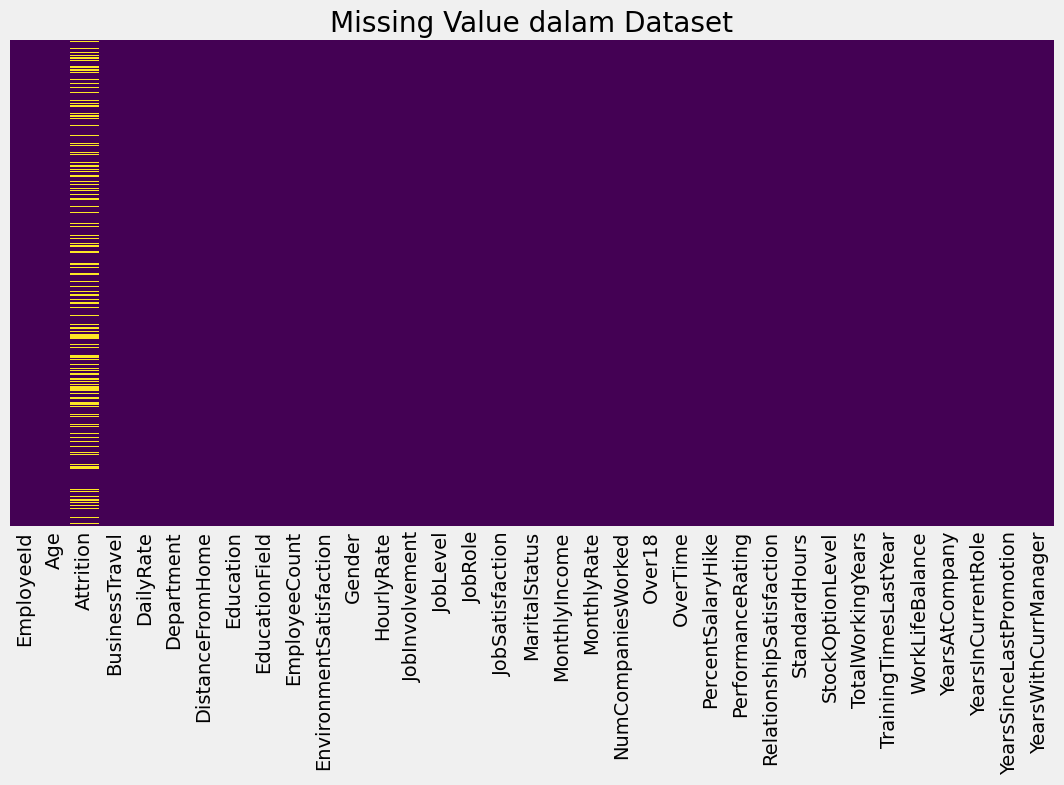


Jumlah missing value per kolom:
Attrition    412
dtype: int64

Persentase missing value:
Attrition    28.027211
dtype: float64


In [4]:
# Memeriksa missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value dalam Dataset')
plt.show()

print("\nJumlah missing value per kolom:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Persentase missing values
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage = missing_percentage[missing_percentage > 0]
print("\nPersentase missing value:")
print(missing_percentage)

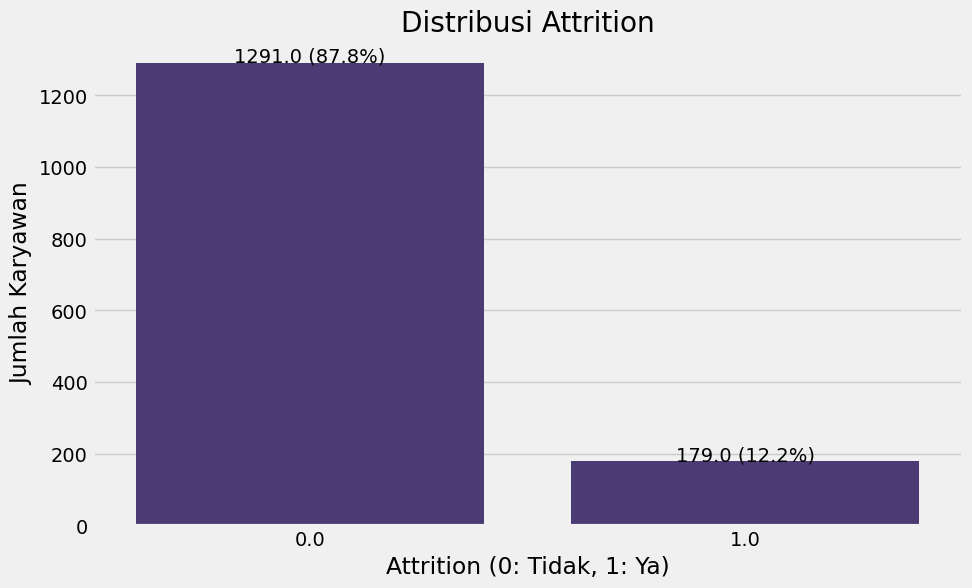

In [5]:
# Mengkonversi kolom Attrition ke tipe yang sesuai dan menangani missing values
df['Attrition'] = df['Attrition'].fillna(0).astype(float)

# Visualisasi distribusi target (Attrition)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df['Attrition'])
plt.title('Distribusi Attrition')
plt.xlabel('Attrition (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah Karyawan')

# Menambahkan anotasi jumlah dan persentase
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            f'{height} ({100 * height / total:.1f}%)',
            ha="center")

plt.show()

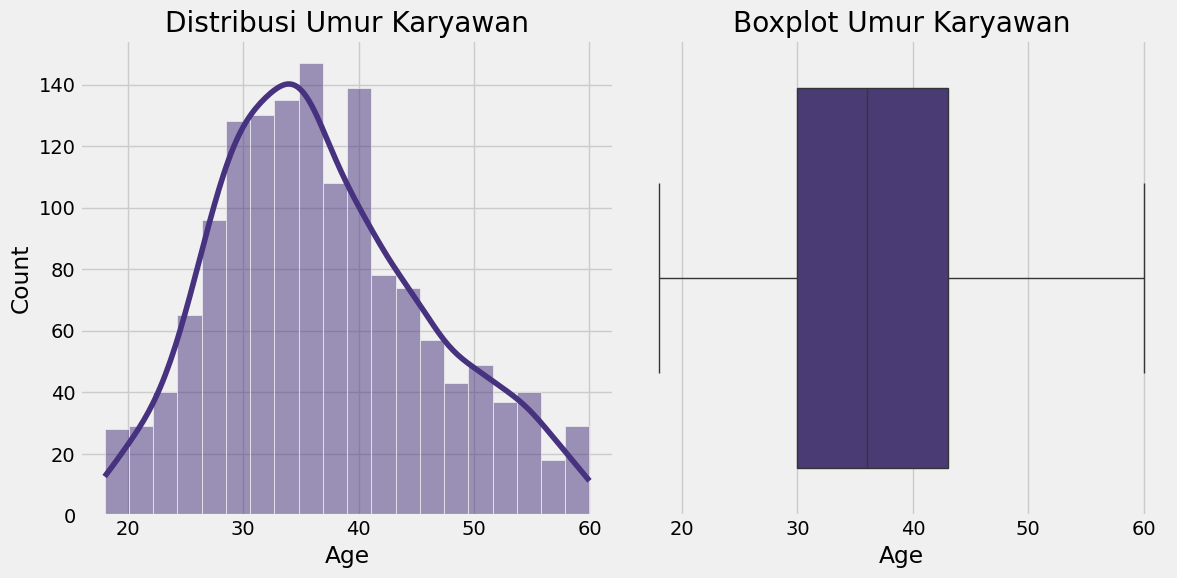

In [6]:
# Analisis distribusi umur karyawan
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', kde=True, bins=20)
plt.title('Distribusi Umur Karyawan')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'])
plt.title('Boxplot Umur Karyawan')

plt.tight_layout()
plt.show()

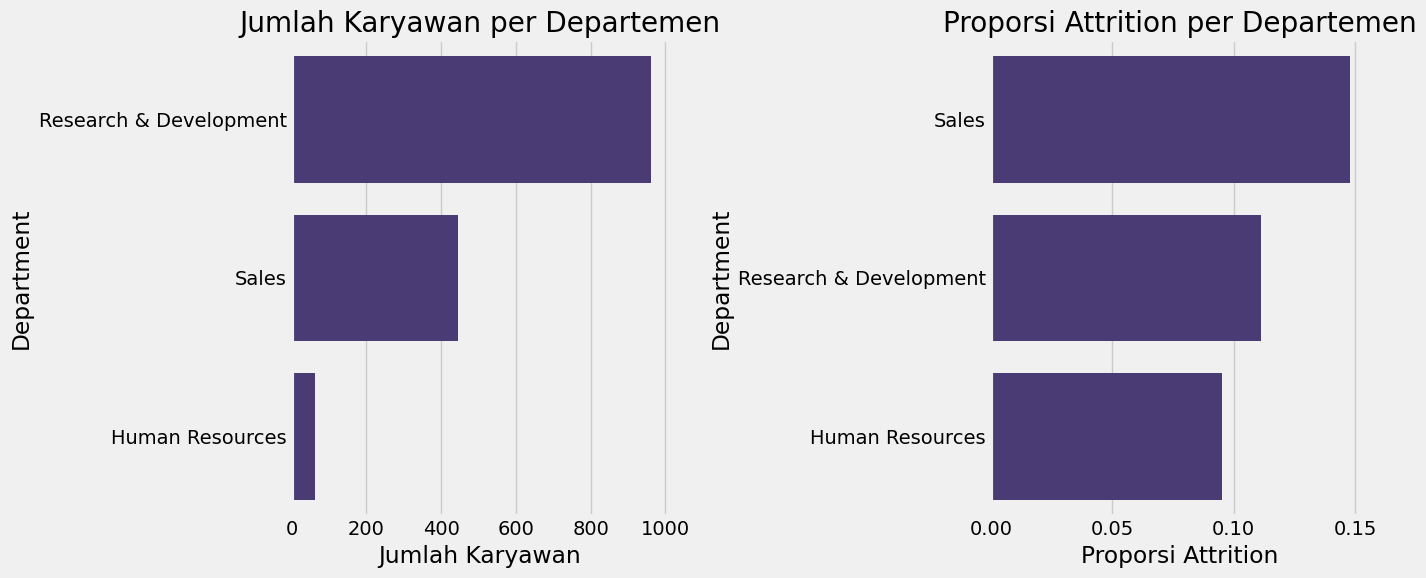

In [7]:
# Analisis berdasarkan departemen
plt.figure(figsize=(14, 6))

# Jumlah karyawan per departemen
plt.subplot(1, 2, 1)
dept_counts = df['Department'].value_counts()
sns.barplot(x=dept_counts.values, y=dept_counts.index)
plt.title('Jumlah Karyawan per Departemen')
plt.xlabel('Jumlah Karyawan')

# Proporsi attrition per departemen
plt.subplot(1, 2, 2)
attrition_by_dept = df.groupby('Department')['Attrition'].mean().sort_values(ascending=False)
sns.barplot(x=attrition_by_dept.values, y=attrition_by_dept.index)
plt.title('Proporsi Attrition per Departemen')
plt.xlabel('Proporsi Attrition')

plt.tight_layout()
plt.show()

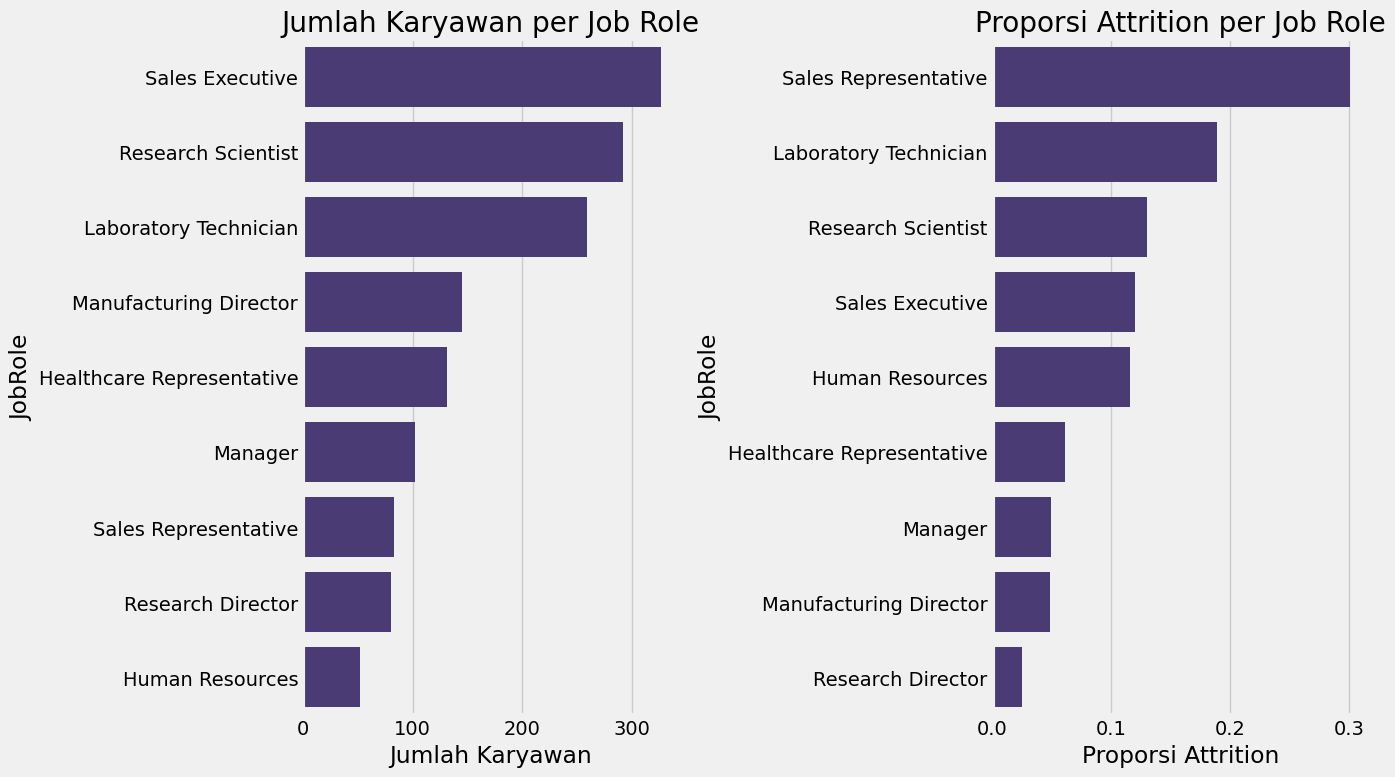

In [8]:
# Analisis berdasarkan Job Role
plt.figure(figsize=(14, 8))

# Jumlah karyawan per job role
role_counts = df['JobRole'].value_counts()
plt.subplot(1, 2, 1)
sns.barplot(x=role_counts.values, y=role_counts.index)
plt.title('Jumlah Karyawan per Job Role')
plt.xlabel('Jumlah Karyawan')

# Proporsi attrition per job role
plt.subplot(1, 2, 2)
attrition_by_role = df.groupby('JobRole')['Attrition'].mean().sort_values(ascending=False)
sns.barplot(x=attrition_by_role.values, y=attrition_by_role.index)
plt.title('Proporsi Attrition per Job Role')
plt.xlabel('Proporsi Attrition')

plt.tight_layout()
plt.show()

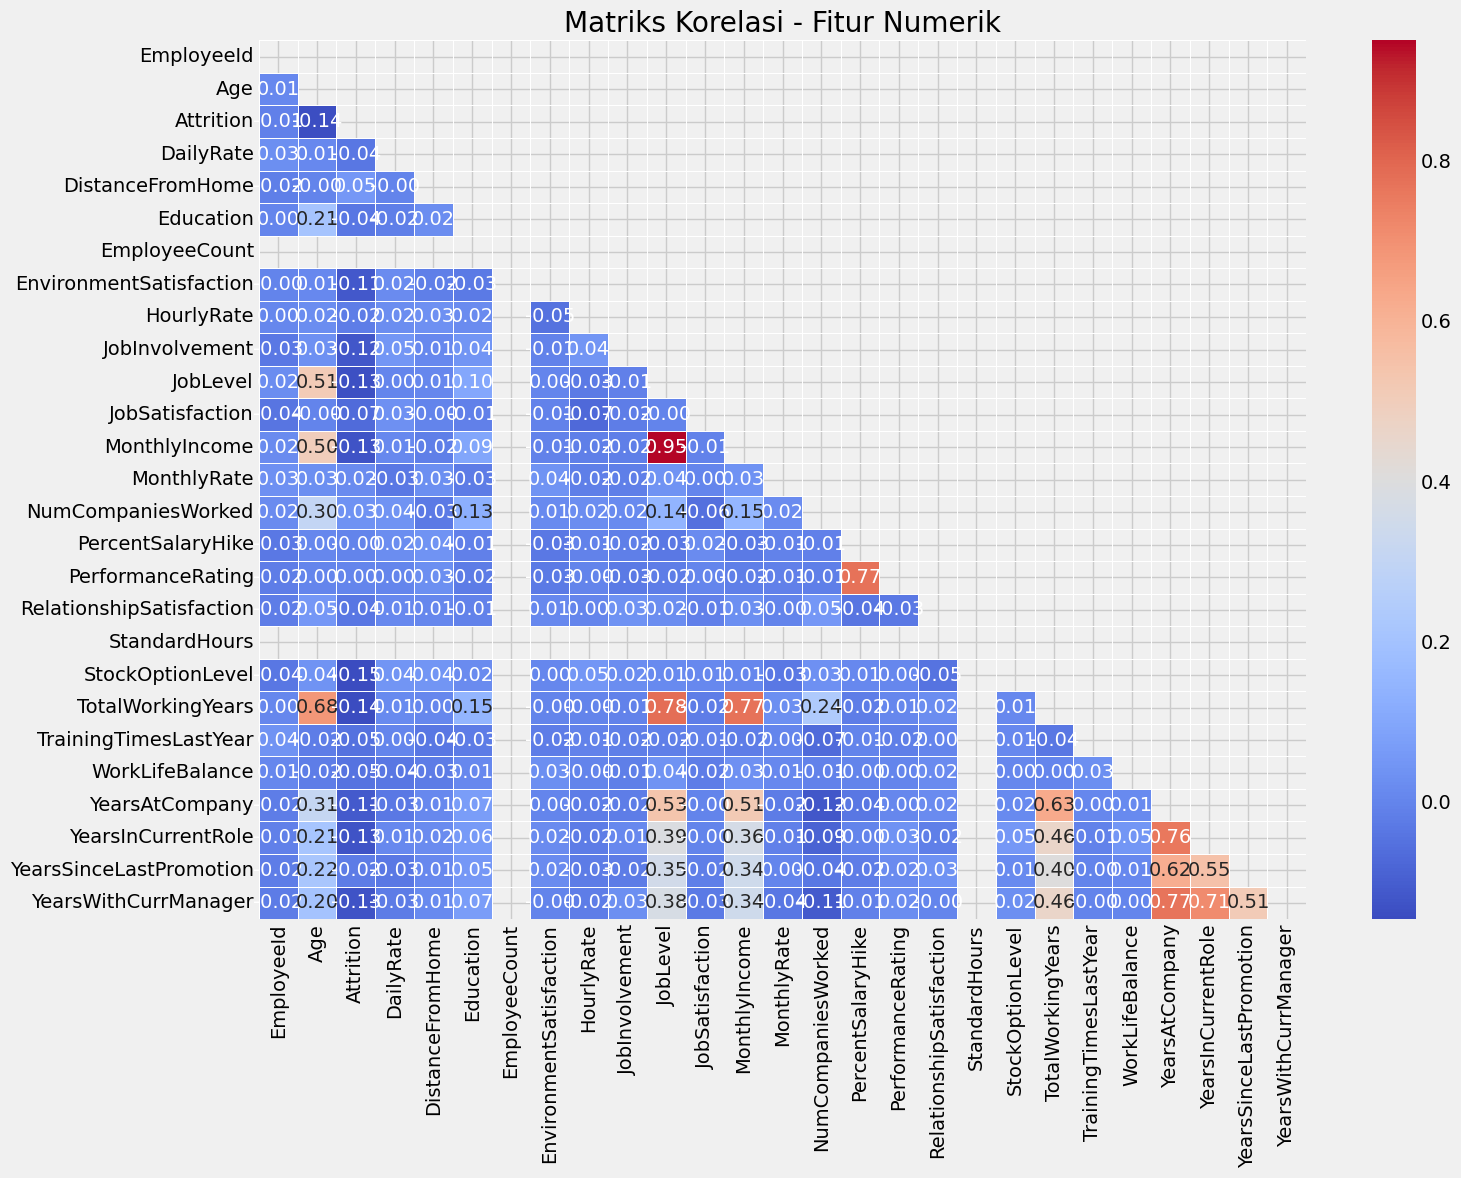


Korelasi fitur numerik dengan Attrition:
Attrition                   1.000000
DistanceFromHome            0.054043
NumCompaniesWorked          0.033253
MonthlyRate                 0.016637
PerformanceRating           0.002770
PercentSalaryHike          -0.001424
EmployeeId                 -0.013866
HourlyRate                 -0.018990
YearsSinceLastPromotion    -0.024932
DailyRate                  -0.036909
RelationshipSatisfaction   -0.039439
Education                  -0.039445
WorkLifeBalance            -0.047892
TrainingTimesLastYear      -0.048547
JobSatisfaction            -0.068709
YearsAtCompany             -0.110546
EnvironmentSatisfaction    -0.112694
JobInvolvement             -0.118902
YearsInCurrentRole         -0.127525
YearsWithCurrManager       -0.127744
MonthlyIncome              -0.128963
JobLevel                   -0.134312
Age                        -0.140856
TotalWorkingYears          -0.143096
StockOptionLevel           -0.146786
EmployeeCount                    

In [9]:
# Memilih kolom-kolom numerik yang tersedia di dataset untuk analisis korelasi
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Attrition' in numeric_cols and len(numeric_cols) > 1:
    # Hitung korelasi
    correlation = df[numeric_cols].corr()

    # Visualisasi matriks korelasi
    plt.figure(figsize=(16, 12))
    mask = np.triu(correlation)
    sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Matriks Korelasi - Fitur Numerik')
    plt.tight_layout()
    plt.show()

    # Korelasi dengan Attrition
    if 'Attrition' in df.columns:
        attrition_corr = correlation['Attrition'].sort_values(ascending=False)
        print("\nKorelasi fitur numerik dengan Attrition:")
        print(attrition_corr)

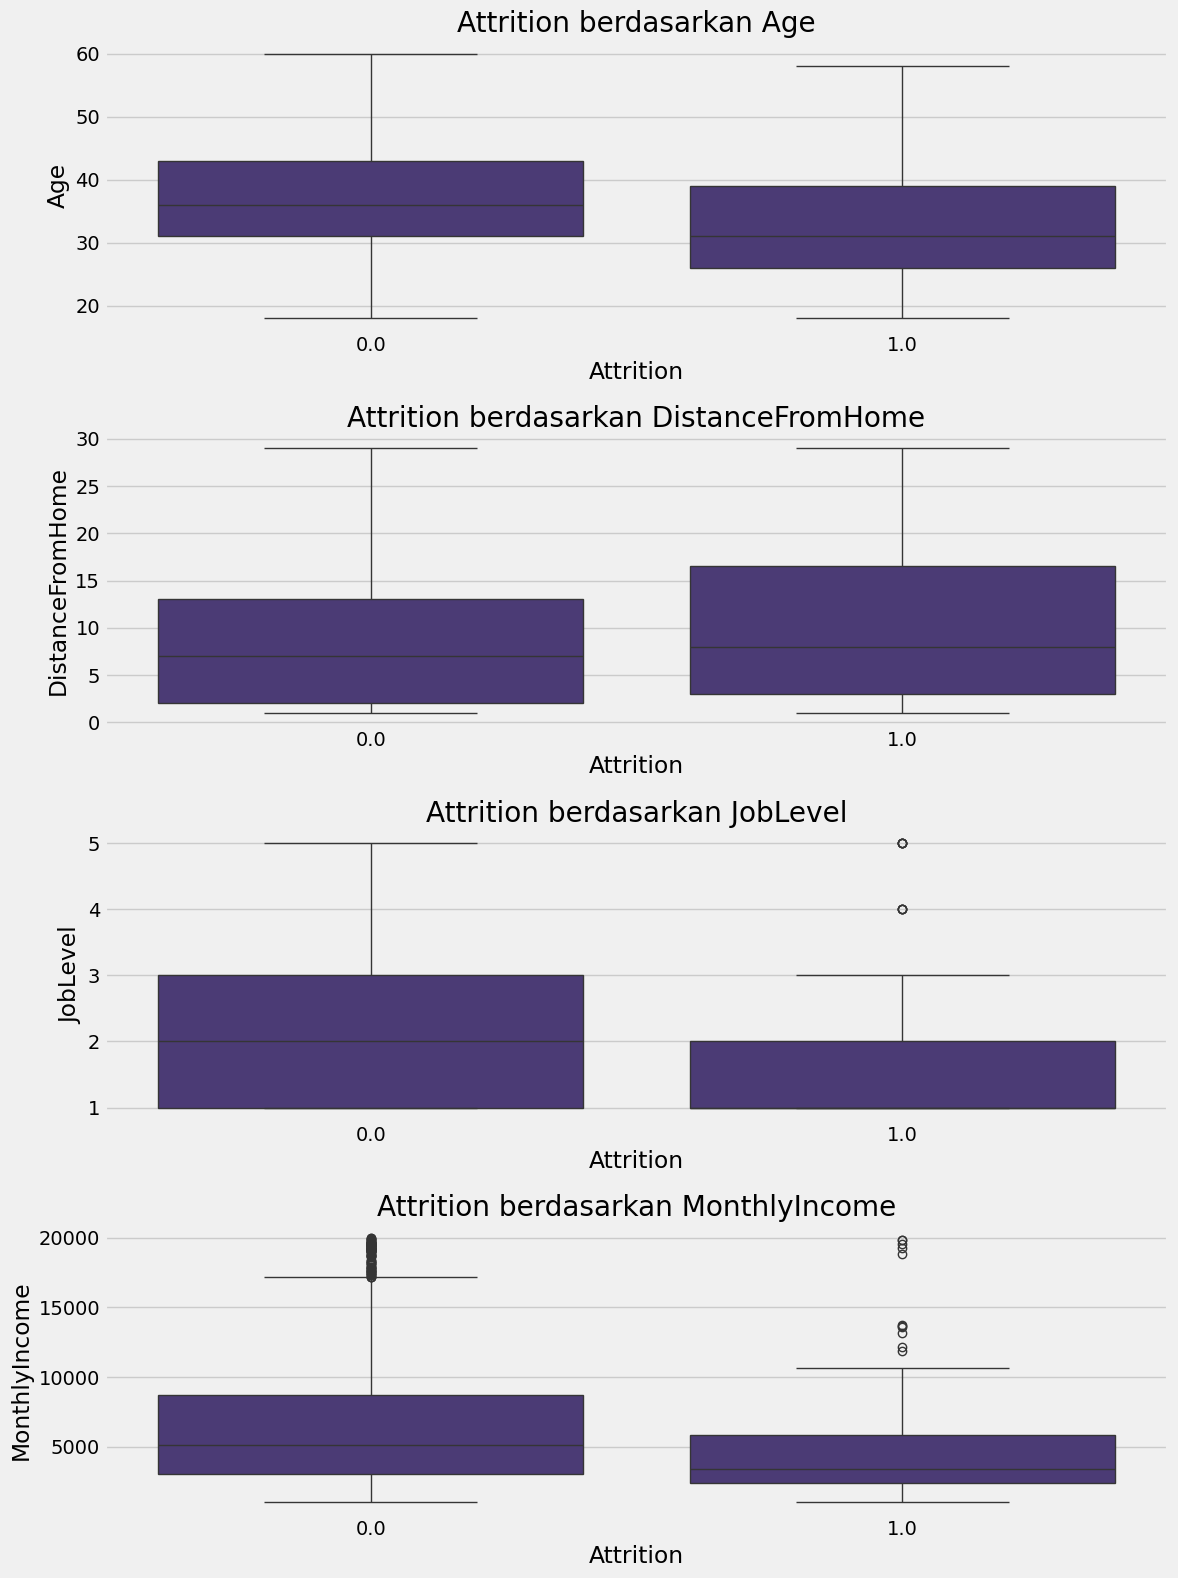

In [10]:
# Visualisasi untuk faktor-faktor penting yang mungkin mempengaruhi attrition
important_factors = ['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome']
factors_available = [col for col in important_factors if col in df.columns]

if len(factors_available) > 0:
    fig, axes = plt.subplots(len(factors_available), 1, figsize=(12, 4*len(factors_available)))

    if len(factors_available) == 1:
        axes = [axes]  # Pastikan axes selalu list untuk indexing

    for i, factor in enumerate(factors_available):
        sns.boxplot(x='Attrition', y=factor, data=df, ax=axes[i])
        axes[i].set_title(f'Attrition berdasarkan {factor}')

    plt.tight_layout()
    plt.show()

In [24]:
# Visualisasi interaktif dengan Plotly
# Scatter plot interaktif
if all(col in df.columns for col in ['Age', 'MonthlyIncome']):
    fig = px.scatter(df,
                   x='Age',
                   y='MonthlyIncome',
                   color='Attrition',
                   hover_data=['Department', 'JobRole'],
                   title='Hubungan Umur, Pendapatan Bulanan, dan Attrition')
    fig.show()

## Data Preparation / Preprocessing

In [25]:
# Menangani missing values pada seluruh dataset
# Untuk kolom numerik, gunakan median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Untuk kolom kategorikal, gunakan modus (nilai yang paling sering muncul)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Memastikan Attrition dikonversi menjadi nilai numerik (0 dan 1)
df['Attrition'] = df['Attrition'].fillna(0).astype(float)

# Memeriksa kembali missing values setelah imputasi
print("Jumlah missing value setelah imputasi:", df.isnull().sum().sum())

Jumlah missing value setelah imputasi: 0


In [26]:
# Feature Engineering: Membuat fitur-fitur baru yang relevan

# 1. Rasio Gaji/Pengalaman (jika kolom-kolom tersedia)
if all(col in df.columns for col in ['MonthlyIncome', 'TotalWorkingYears']):
    df['IncomePerExperienceYear'] = df['MonthlyIncome'] / (df['TotalWorkingYears'] + 1)

# 2. Kategori Jarak dari Rumah
df['DistanceCategory'] = pd.cut(df['DistanceFromHome'],
                               bins=[0, 5, 10, 20, float('inf')],
                               labels=['Very Close', 'Close', 'Far', 'Very Far'])

# 3. Rasio Promosi (jika tersedia)
if all(col in df.columns for col in ['YearsAtCompany', 'YearsSinceLastPromotion']):
    df['PromotionRatio'] = (df['YearsAtCompany'] - df['YearsSinceLastPromotion']) / (df['YearsAtCompany'] + 1)

# 4. Rata-rata Kepuasan (jika tersedia)
satisfaction_cols = [col for col in ['JobSatisfaction', 'EnvironmentSatisfaction',
                                   'WorkLifeBalance', 'RelationshipSatisfaction']
                    if col in df.columns]
if len(satisfaction_cols) > 0:
    df['AverageSatisfaction'] = df[satisfaction_cols].mean(axis=1)

# 5. Kategori Umur
df['AgeGroup'] = pd.cut(df['Age'],
                       bins=[0, 25, 35, 45, 55, float('inf')],
                       labels=['<25', '25-35', '35-45', '45-55', '>55'])

print("Fitur-fitur baru yang telah dibuat:")
new_features = ['DistanceCategory', 'AgeGroup']
if 'IncomePerExperienceYear' in df.columns: new_features.append('IncomePerExperienceYear')
if 'PromotionRatio' in df.columns: new_features.append('PromotionRatio')
if 'AverageSatisfaction' in df.columns: new_features.append('AverageSatisfaction')

for feature in new_features:
    print(f"- {feature}")

Fitur-fitur baru yang telah dibuat:
- DistanceCategory
- AgeGroup
- IncomePerExperienceYear
- PromotionRatio
- AverageSatisfaction


In [27]:
# Encoding fitur kategorikal
# Identifikasi kolom kategorikal
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Fitur kategorikal yang akan di-encode:", categorical_features)

# Pisahkan kolom target (Attrition)
df['Attrition'] = df['Attrition'].astype(float)

# One-hot encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(df, columns=[col for col in categorical_features if col != 'Attrition'],
                           drop_first=True, dtype=int)

print(f"Ukuran dataset setelah encoding: {df_encoded.shape}")
df_encoded.head()

Fitur kategorikal yang akan di-encode: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'DistanceCategory', 'AgeGroup']
Ukuran dataset setelah encoding: (1470, 58)


,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,DistanceCategory_Close,DistanceCategory_Far,DistanceCategory_Very Far,AgeGroup_25-35,AgeGroup_35-45,AgeGroup_45-55,AgeGroup_>55
0,1,38,0.0,1444,1,4,1,4,88,3,...,1,0,1,0,0,0,0,1,0,0
1,2,37,1.0,1141,11,2,1,1,61,1,...,1,0,0,0,1,0,0,1,0,0
2,3,51,1.0,1323,4,4,1,1,34,3,...,1,0,1,0,0,0,0,0,1,0
3,4,42,0.0,555,26,3,1,3,77,3,...,1,0,0,0,0,1,0,1,0,0
4,5,40,0.0,1194,2,4,1,3,98,3,...,1,0,0,0,0,0,0,1,0,0


In [28]:
# Pemisahan data untuk fitur dan target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Pembagian data menjadi data latih dan data uji dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Ukuran data latih: {X_train.shape}")
print(f"Ukuran data uji: {X_test.shape}")
print(f"Distribusi target pada data latih: {pd.Series(y_train).value_counts(normalize=True)}")
print(f"Distribusi target pada data uji: {pd.Series(y_test).value_counts(normalize=True)}")

Ukuran data latih: (1176, 57)
Ukuran data uji: (294, 57)
Distribusi target pada data latih: Attrition
0.0    0.878401
1.0    0.121599
Name: proportion, dtype: float64
Distribusi target pada data uji: Attrition
0.0    0.877551
1.0    0.122449
Name: proportion, dtype: float64


In [29]:
# Normalisasi fitur numerik
# Identifikasi kolom numerik pada data yang sudah di-encode
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Buat dan terapkan scaler
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

print(f"Data telah dinormalisasi. Contoh beberapa baris data terlatih:")
X_train_scaled.head()

Data telah dinormalisasi. Contoh beberapa baris data terlatih:


,EmployeeId,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,DistanceCategory_Close,DistanceCategory_Far,DistanceCategory_Very Far,AgeGroup_25-35,AgeGroup_35-45,AgeGroup_45-55,AgeGroup_>55
925,0.469735,-0.315560,0.578198,-0.405341,1.054264,0.0,0.249367,-1.013265,-1.035984,-0.046317,...,-0.924602,-0.685565,-0.627188,1.671391,-0.455403,-0.399704,1.199931,-0.684226,-0.432065,-0.172547
469,-0.606978,-1.523635,-1.050012,-1.022644,-0.905917,0.0,1.160100,-0.915328,0.390617,-0.954140,...,1.081546,-0.685565,-0.627188,-0.598304,-0.455403,-0.399704,-0.833381,-0.684226,-0.432065,-0.172547
638,-0.207933,0.013915,1.587787,-0.652262,-1.886007,0.0,0.249367,-0.572548,0.390617,-0.954140,...,1.081546,-0.685565,1.594418,-0.598304,-0.455403,-0.399704,-0.833381,1.461506,-0.432065,-0.172547
480,-0.581005,-0.754860,0.135265,-1.022644,-1.886007,0.0,1.160100,-0.523580,-1.035984,-0.046317,...,1.081546,-0.685565,1.594418,-0.598304,-0.455403,-0.399704,1.199931,-0.684226,-0.432065,-0.172547
573,-0.361412,-0.864685,-0.552641,1.323106,-1.886007,0.0,1.160100,-1.258107,0.390617,-0.954140,...,1.081546,-0.685565,-0.627188,-0.598304,2.195856,-0.399704,1.199931,-0.684226,-0.432065,-0.172547


## Modeling

In [30]:
# Mendefinisikan beberapa model yang akan dicoba
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

# Tambahkan XGBoost dengan pengecekan versi
try:
    models['XGBoost'] = XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False, eval_metric='logloss')
except TypeError:
    # Untuk versi XGBoost yang lebih baru yang tidak menerima use_label_encoder
    models['XGBoost'] = XGBClassifier(random_state=42, n_estimators=100, eval_metric='logloss')

print("Model yang akan dievaluasi:", list(models.keys()))

# Dictionary untuk menyimpan hasil evaluasi
results = {}

# Fungsi untuk evaluasi model dengan tambahan debugging
def evaluate_model(model, X_train, X_test, y_train, y_test):
    print(f"Training model: {type(model).__name__}")
    try:
        # Melatih model
        model.fit(X_train, y_train)
        print(f"Model training selesai")

        # Prediksi pada data test
        y_pred = model.predict(X_test)
        print(f"Prediksi selesai, shape: {y_pred.shape}")

        # Cek apakah model memiliki predict_proba
        if hasattr(model, 'predict_proba'):
            y_prob = model.predict_proba(X_test)[:, 1]
            print(f"Probabilitas prediksi berhasil, shape: {y_prob.shape}")
        else:
            y_prob = None
            print("Model tidak memiliki fungsi predict_proba")

        # Menghitung metrik evaluasi
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        # Menghitung AUC jika model bisa menghasilkan probabilitas
        auc_score = None
        if y_prob is not None:
            try:
                fpr, tpr, _ = roc_curve(y_test, y_prob)
                auc_score = auc(fpr, tpr)
                print(f"AUC berhasil dihitung: {auc_score:.4f}")
            except Exception as e:
                print(f"Error menghitung AUC: {e}")
                auc_score = None

        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc': auc_score,
            'model': model,
            'y_pred': y_pred,
            'y_prob': y_prob
        }
    except Exception as e:
        print(f"Error dalam evaluasi model: {e}")
        return None

# Evaluasi setiap model satu per satu
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Melatih dan mengevaluasi model {name}...")
    results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    if results[name]:
        print(f"Evaluasi {name} selesai dengan metrik:")
        print(f"  - Accuracy: {results[name]['accuracy']:.4f}")
        print(f"  - F1 Score: {results[name]['f1']:.4f}")
    else:
        print(f"Evaluasi {name} gagal")
    print(f"{'='*50}")

# Tabel perbandingan hasil evaluasi (hanya untuk model yang berhasil)
valid_results = {name: result for name, result in results.items() if result is not None}
if valid_results:
    comparison = pd.DataFrame({
        name: {
            'Accuracy': results[name]['accuracy'],
            'Precision': results[name]['precision'],
            'Recall': results[name]['recall'],
            'F1 Score': results[name]['f1'],
            'AUC': results[name]['auc'] if results[name]['auc'] is not None else np.nan
        } for name in valid_results.keys()
    })

    print("\nPerbandingan kinerja berbagai model:")
    comparison_df = comparison.T.sort_values(by='F1 Score', ascending=False)
    print(comparison_df)

    # Tentukan model terbaik berdasarkan F1 Score
    best_model_name = comparison_df.index[0]
    print(f"\nModel terbaik adalah {best_model_name} dengan F1 Score {comparison_df.loc[best_model_name, 'F1 Score']:.4f}")
else:
    print("Tidak ada model yang berhasil dievaluasi")
    # Gunakan model default jika semua evaluasi gagal
    best_model_name = "Random Forest"
    print(f"Menggunakan {best_model_name} sebagai model default")

# Simpan model terbaik untuk digunakan selanjutnya
best_model = models[best_model_name]
best_model.fit(X_train_scaled, y_train)
print(f"Model terbaik ({best_model_name}) telah dilatih ulang pada seluruh data training")

# Cek apakah model memiliki feature_importances_
print(f"Model {best_model_name} memiliki feature_importances_: {hasattr(best_model, 'feature_importances_')}")

Model yang akan dievaluasi: ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']

Melatih dan mengevaluasi model Logistic Regression...
Training model: LogisticRegression
Model training selesai
Prediksi selesai, shape: (294,)
Probabilitas prediksi berhasil, shape: (294,)
AUC berhasil dihitung: 0.8249
Evaluasi Logistic Regression selesai dengan metrik:
  - Accuracy: 0.7653
  - F1 Score: 0.4202

Melatih dan mengevaluasi model Random Forest...
Training model: RandomForestClassifier
Model training selesai
Prediksi selesai, shape: (294,)
Probabilitas prediksi berhasil, shape: (294,)
AUC berhasil dihitung: 0.7888
Evaluasi Random Forest selesai dengan metrik:
  - Accuracy: 0.8810
  - F1 Score: 0.0541

Melatih dan mengevaluasi model Gradient Boosting...
Training model: GradientBoostingClassifier
Model training selesai
Prediksi selesai, shape: (294,)
Probabilitas prediksi berhasil, shape: (294,)
AUC berhasil dihitung: 0.7790
Evaluasi Gradient Boosting selesai dengan metrik:


In [31]:
# Fine-tuning untuk model terbaik dengan parameter yang lebih sederhana
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1]
    },
    'Random Forest': {
        'n_estimators': [100],
        'max_depth': [None, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100],
        'learning_rate': [0.1]
    },
    'XGBoost': {
        'n_estimators': [100],
        'learning_rate': [0.1]
    }
}

# Pastikan model terbaik ada dalam param_grids
if best_model_name in param_grids:
    param_grid = param_grids[best_model_name]

    # Gunakan GridSearchCV dengan cv yang lebih kecil untuk kecepatan
    print(f"Melakukan grid search untuk model {best_model_name} dengan parameter: {param_grid}")
    grid_search = GridSearchCV(
        estimator=models[best_model_name],
        param_grid=param_grid,
        cv=3,  # Lebih cepat dengan 3-fold CV
        scoring='f1',
        n_jobs=-1
    )

    try:
        # Latih model dengan grid search
        grid_search.fit(X_train_scaled, y_train)

        # Parameter terbaik dan skor
        print(f"Parameter terbaik untuk {best_model_name}:")
        print(grid_search.best_params_)
        print(f"Skor F1 terbaik: {grid_search.best_score_:.4f}")

        # Evaluasi model dengan parameter terbaik
        best_model = grid_search.best_estimator_
        best_model_results = evaluate_model(best_model, X_train_scaled, X_test_scaled, y_train, y_test)

        if best_model_results:
            print("\nHasil evaluasi model terbaik setelah fine-tuning:")
            for metric, value in best_model_results.items():
                if metric not in ['model', 'y_pred', 'y_prob']:
                    print(f"{metric}: {value:.4f}" if isinstance(value, (int, float)) else f"{metric}: {value}")
    except Exception as e:
        print(f"Error dalam grid search: {e}")
        print("Menggunakan model terbaik tanpa fine-tuning")
        best_model = models[best_model_name]
        best_model.fit(X_train_scaled, y_train)
        best_model_results = evaluate_model(best_model, X_train_scaled, X_test_scaled, y_train, y_test)
else:
    print(f"Tidak ada parameter grid yang ditentukan untuk {best_model_name}, menggunakan model tanpa fine-tuning")
    best_model = models[best_model_name]
    best_model.fit(X_train_scaled, y_train)
    best_model_results = evaluate_model(best_model, X_train_scaled, X_test_scaled, y_train, y_test)

Melakukan grid search untuk model Logistic Regression dengan parameter: {'C': [0.1, 1]}
Parameter terbaik untuk Logistic Regression:
{'C': 0.1}
Skor F1 terbaik: 0.3991
Training model: LogisticRegression
Model training selesai
Prediksi selesai, shape: (294,)
Probabilitas prediksi berhasil, shape: (294,)
AUC berhasil dihitung: 0.8416

Hasil evaluasi model terbaik setelah fine-tuning:
accuracy: 0.7721
precision: 0.3176
recall: 0.7500
f1: 0.4463
auc: 0.8416


## Evaluation

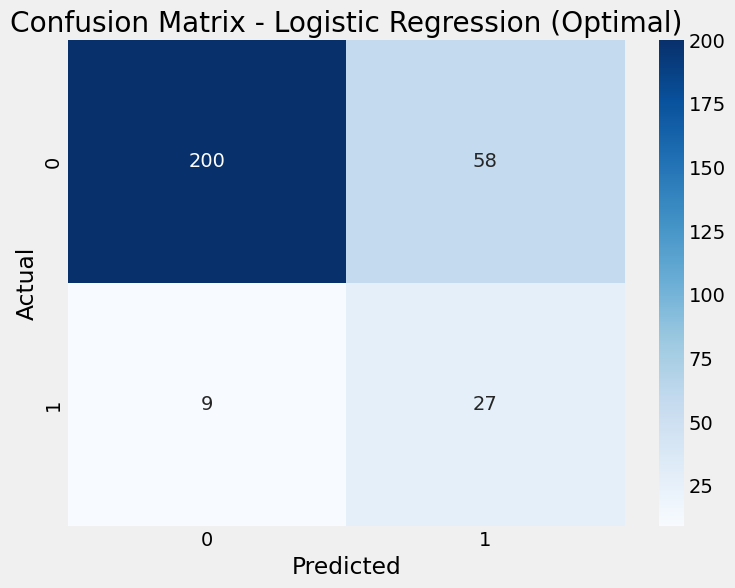

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.78      0.86       258
         1.0       0.32      0.75      0.45        36

    accuracy                           0.77       294
   macro avg       0.64      0.76      0.65       294
weighted avg       0.88      0.77      0.81       294



In [32]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_model_results['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name} (Optimal)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Menghitung dan menampilkan classification report
print("Classification Report:")
print(classification_report(y_test, best_model_results['y_pred']))

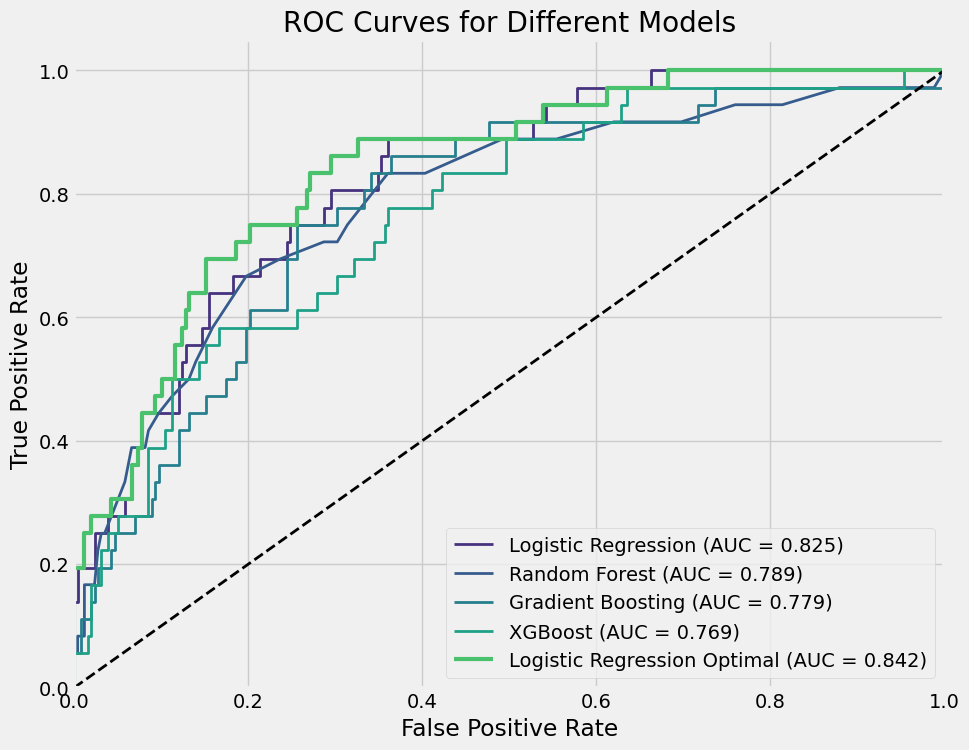

In [33]:
# Visualisasi ROC curve untuk semua model
plt.figure(figsize=(10, 8))

for name, result in results.items():
    if result['y_prob'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Tambahkan ROC curve untuk model terbaik setelah fine-tuning
if best_model_results['y_prob'] is not None:
    fpr, tpr, _ = roc_curve(y_test, best_model_results['y_prob'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=3, label=f'{best_model_name} Optimal (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

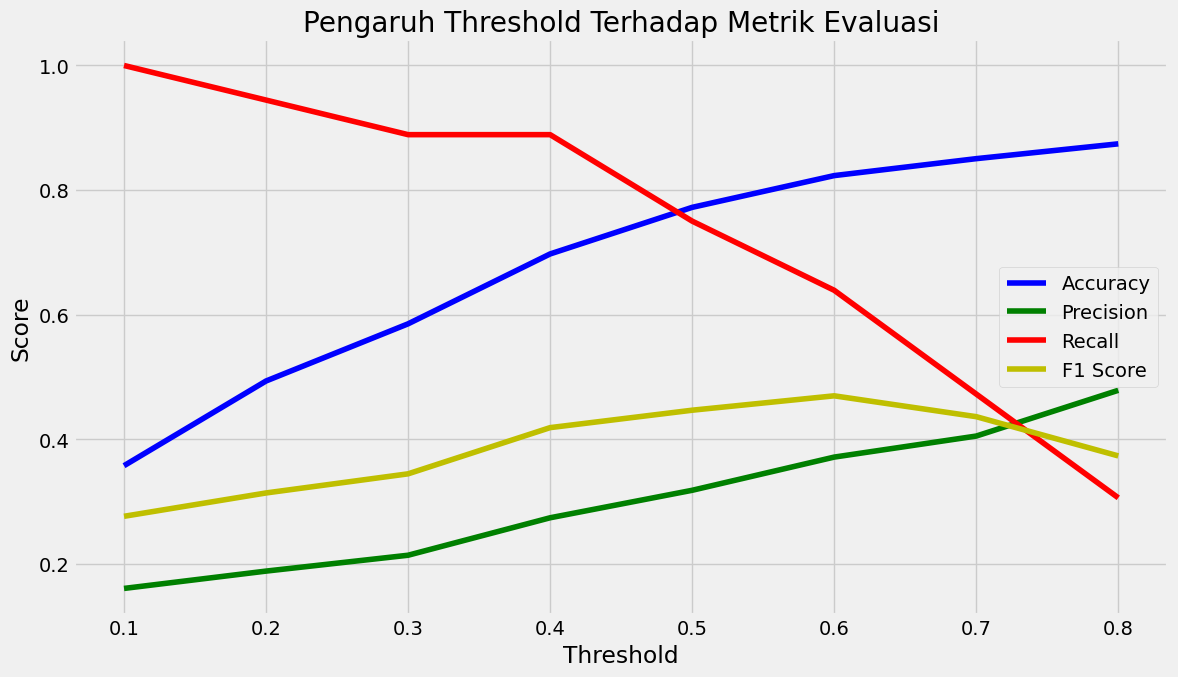

Threshold optimal berdasarkan F1 Score:
Threshold    0.600000
Accuracy     0.823129
Precision    0.370968
Recall       0.638889
F1 Score     0.469388
Name: 5, dtype: float64


In [34]:
# Analisis threshold untuk optimasi model
if best_model_results['y_prob'] is not None:
    thresholds = np.arange(0.1, 0.9, 0.1)
    results_per_threshold = []

    for threshold in thresholds:
        y_pred_t = (best_model_results['y_prob'] >= threshold).astype(int)

        accuracy = accuracy_score(y_test, y_pred_t)
        precision = precision_score(y_test, y_pred_t, zero_division=0)
        recall = recall_score(y_test, y_pred_t, zero_division=0)
        f1 = f1_score(y_test, y_pred_t, zero_division=0)

        results_per_threshold.append({
            'Threshold': threshold,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    # Convert results to DataFrame
    threshold_df = pd.DataFrame(results_per_threshold)

    # Visualisasi pengaruh threshold terhadap metrik
    plt.figure(figsize=(12, 7))
    plt.plot(threshold_df['Threshold'], threshold_df['Accuracy'], 'b-', label='Accuracy')
    plt.plot(threshold_df['Threshold'], threshold_df['Precision'], 'g-', label='Precision')
    plt.plot(threshold_df['Threshold'], threshold_df['Recall'], 'r-', label='Recall')
    plt.plot(threshold_df['Threshold'], threshold_df['F1 Score'], 'y-', label='F1 Score')
    plt.title('Pengaruh Threshold Terhadap Metrik Evaluasi')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("Threshold optimal berdasarkan F1 Score:")
    best_threshold_idx = threshold_df['F1 Score'].idxmax()
    print(threshold_df.iloc[best_threshold_idx])

In [35]:
# Ringkasan temuan dan rekomendasi bisnis
print("\n======= RINGKASAN TEMUAN DAN REKOMENDASI =======")
print("\nRingkasan Evaluasi Model:")
print(f"Model terbaik: {best_model_name} dengan parameter optimal")
print(f"Accuracy: {best_model_results['accuracy']:.4f}")
print(f"Precision: {best_model_results['precision']:.4f}")
print(f"Recall: {best_model_results['recall']:.4f}")
print(f"F1 Score: {best_model_results['f1']:.4f}")
if best_model_results['auc'] != 'N/A':
    print(f"AUC: {best_model_results['auc']:.4f}")

if hasattr(best_model, 'feature_importances_'):
    print("\nFaktor-faktor utama yang mempengaruhi attrition:")
    for idx, row in feature_importance_df.head(5).iterrows():
        print(f"- {row['Feature']}: {row['Importance']:.4f}")

print("\nRekomendasi Bisnis:")
print("1. Fokus pada program retensi karyawan yang ditargetkan pada faktor-faktor utama penyebab attrition")
print("2. Implementasikan sistem peringatan dini untuk mengidentifikasi karyawan dengan risiko attrition tinggi")
print("3. Tinjau kebijakan kompensasi dan promosi, terutama untuk peran dengan tingkat attrition tinggi")
print("4. Lakukan survei kepuasan karyawan secara berkala untuk memonitor metrik kunci yang terkait dengan attrition")
print("5. Kembangkan program pengembangan karir yang jelas untuk meningkatkan retensi")

# Konversi model ke format yang dapat digunakan untuk implementasi
import pickle

# Simpan model terlatih
with open('employee_attrition_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Simpan scaler
with open('employee_attrition_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("\nModel dan scaler telah disimpan untuk implementasi.")


======= RINGKASAN TEMUAN DAN REKOMENDASI =======

Ringkasan Evaluasi Model:
Model terbaik: Logistic Regression dengan parameter optimal
Accuracy: 0.7721
Precision: 0.3176
Recall: 0.7500
F1 Score: 0.4463
AUC: 0.8416

Rekomendasi Bisnis:
1. Fokus pada program retensi karyawan yang ditargetkan pada faktor-faktor utama penyebab attrition
2. Implementasikan sistem peringatan dini untuk mengidentifikasi karyawan dengan risiko attrition tinggi
3. Tinjau kebijakan kompensasi dan promosi, terutama untuk peran dengan tingkat attrition tinggi
4. Lakukan survei kepuasan karyawan secara berkala untuk memonitor metrik kunci yang terkait dengan attrition
5. Kembangkan program pengembangan karir yang jelas untuk meningkatkan retensi

Model dan scaler telah disimpan untuk implementasi.


In [36]:
# Unduh model yang telah dilatih
from google.colab import files
files.download('employee_attrition_model.pkl')
files.download('employee_attrition_scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>